<p align="center">
    <img src="JHU.png" width="200" alt="Johns Hopkins University logo">
</p>

# Hands-On Lab: Implementing a Simple Feedforward Neural Network on the Iris Dataset

Estimated time needed: **60** minutes

## Overview:

In this hands-on lab, you will build a simple feedforward neural network to classify flowers in the Iris dataset into three categories: **Setosa**, **Versicolor**, and **Virginica**. The lab involves using Python libraries such as Keras, TensorFlow, and Scikit-learn for data preprocessing, model creation, training, and evaluation. 

You will explore how different optimization algorithms SGD, Momentum, and Adam impact the convergence rate and overall model performance. This lab is designed to provide practical experience with deep learning concepts and expose learners to essential machine learning workflows.


## Objectives
By the end of this lab, learners will be able to:
1. Load and preprocess the Iris dataset, including feature scaling and target one-hot encoding.
2. Implement a feedforward neural network using Keras or TensorFlow.
3. Train and evaluate the neural network using different optimization algorithms:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam Optimizer
4. Visualize and compare the performance of each optimizer using metrics like accuracy, precision, recall, and the confusion matrix.
5. Understand the importance of preprocessing, network design, and hyperparameter tuning in building effective models.


## Dataset Used

**Iris Dataset**:  
The Iris dataset is a widely used toy dataset for classification tasks. It contains 150 samples of iris flowers with the following characteristics:  
- **Features (4)**: Sepal length, Sepal width, Petal length, Petal width.  
- **Target Classes (3)**:  
  - *Setosa* (label 0)  
  - *Versicolor* (label 1)  
  - *Virginica* (label 2)  

Each sample belongs to one of these three categories. The dataset is simple and well-separated, making it ideal for experimenting with basic machine learning and neural networks.

## Implementation: 

### Step 1: Install and Import Necessary Libraries

> **Note**: Please be patient while the required packages are being installed. This may take some time due to the multiple dependencies, but it should complete shortly.

In [1]:
# Install all necessary libraries
!pip install numpy pandas matplotlib seaborn scikit-learn

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 164.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 141.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 95.5 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip


### Step 2: Load and Explore the Dataset

**Explanation**: This code loads the Iris dataset and creates a DataFrame for easier analysis. The pairplot helps visualize relationships between features and classes.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


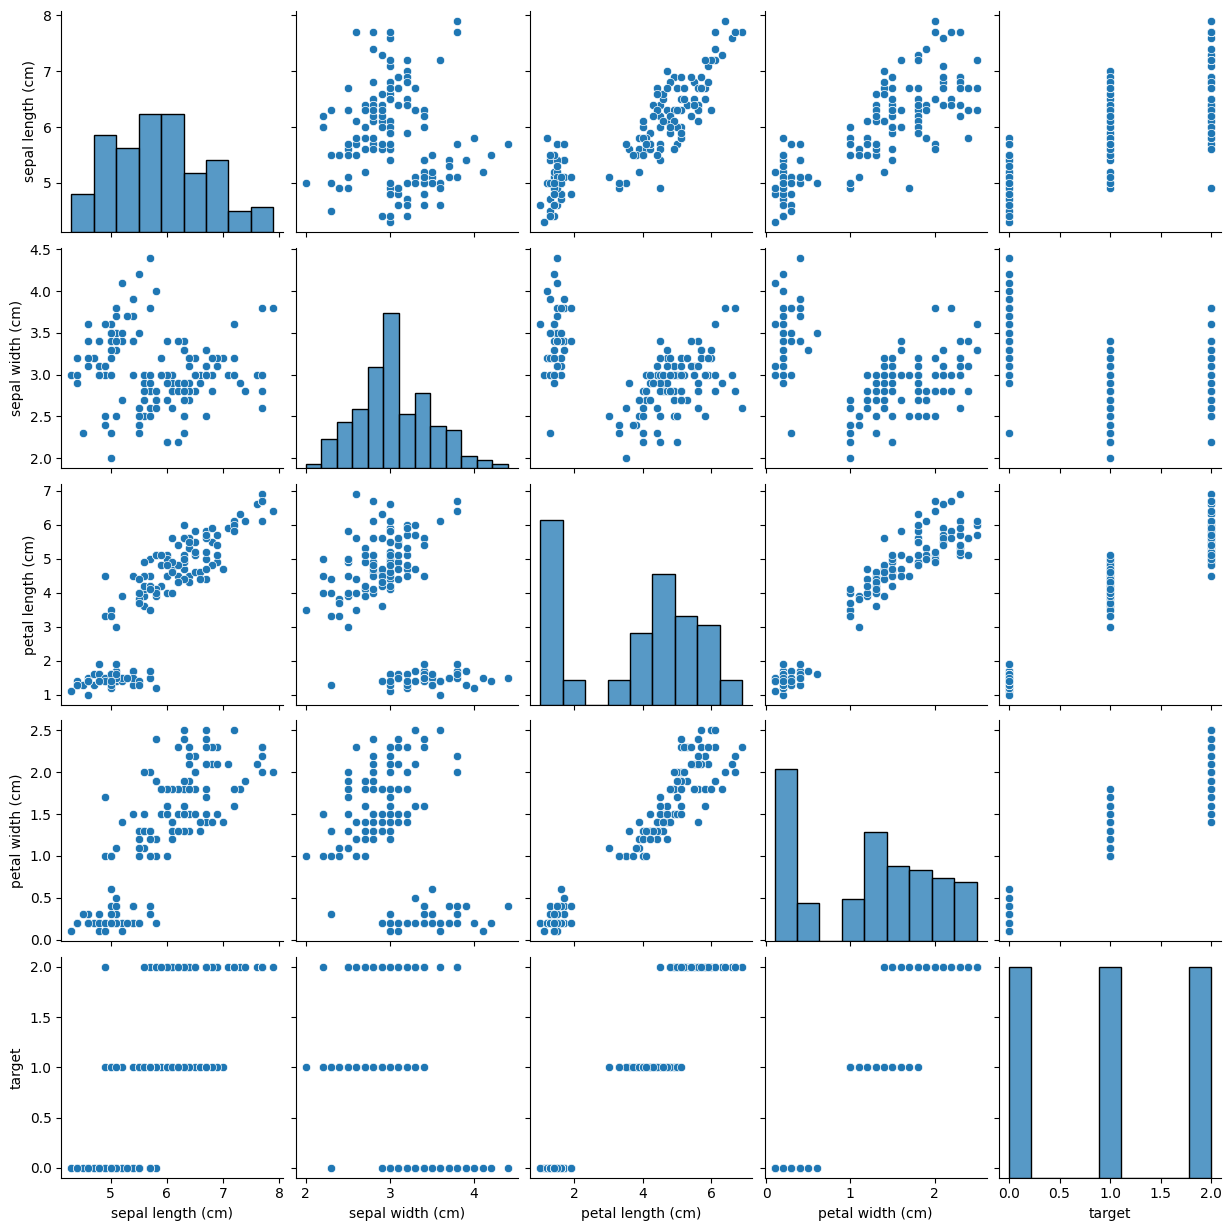

In [4]:
# Load dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])

# Display dataset information
# Write your code here!
display(data)

# Visualize pairplot
# Write your code here!

import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset

# Create a pairplot
sns.pairplot(data)

# Display the plot
plt.show()


<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python

# Display dataset information
print(data.info())  # Shows data types and null values
print(data.head())  # Displays the first 5 rows of the dataset

# Visualize pairplot
sns.pairplot(data, hue='target', diag_kind='kde', markers=["o", "s", "D"])
plt.show()  # Pairwise plots of features with species color-coded

```
</details>

### Step 3:  Preprocess the Data

**Explanation**: The data is split into training and testing sets. The target is converted to one-hot encoding (e.g., [1, 0, 0] for Setosa). Features are standardized for better model performance.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Features and target
X = iris['data']  # Feature matrix (sepal and petal measurements)
y = iris['target'].reshape(-1, 1)  # Target values reshaped into column format

# One-hot encode target
# Write your code here!
# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)  # Use 'sparse_output' instead of 'sparse'
y_encoded = encoder.fit_transform(y)  # Convert target to one-hot encoding

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Standardize features for stability
X_test = scaler.transform(X_test)


<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)  # Use 'sparse_output' instead of 'sparse'
y_encoded = encoder.fit_transform(y)  # Convert target to one-hot encoding

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Standardize features for stability
X_test = scaler.transform(X_test)
    
```
</details>

### Step 4: Design the Feedforward Neural Network

**Explanation**: The network has two hidden layers with ReLU activation and one output layer with softmax activation to predict probabilities for the three classes.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define model
# Write your code here!

def create_model():
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer + 1st hidden layer
        Dense(8, activation='relu'),  # 2nd hidden layer
        Dense(3, activation='softmax')  # Output layer with 3 classes
    ])
    return model

<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python

# Define model
def create_model():
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer + 1st hidden layer
        Dense(8, activation='relu'),  # 2nd hidden layer
        Dense(3, activation='softmax')  # Output layer with 3 classes
    ])
    return model
    
```
</details>

### Step 5: Train the Model with Different Optimization Algorithms

**Explanation**: The model is trained using different optimizers: SGD (basic gradient descent), Momentum (adds velocity), and Adam (adaptive learning rates). Training history is logged for each optimizer.

In [12]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import History

# Train model with different optimizers
optimizers = {'SGD': SGD(learning_rate=0.01), 'Momentum': SGD(learning_rate=0.01, momentum=0.9), 'Adam': Adam(learning_rate=0.01)}
histories = {}

# Loop through each optimizer, train the model, evaluate its performance, and store the training history for comparison.
# Write your code here!

for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer...")
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])  # Compile model
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=8, verbose=0)  # Train
    histories[opt_name] = history.history  # Store training history
    print(f"Final Test Accuracy with {opt_name}: {model.evaluate(X_test, y_test, verbose=0)[1]:.4f}")



Training with SGD optimizer...
Final Test Accuracy with SGD: 0.9333

Training with Momentum optimizer...
Final Test Accuracy with Momentum: 1.0000

Training with Adam optimizer...
Final Test Accuracy with Adam: 1.0000


<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Loop through each optimizer, train the model, evaluate its performance, and store the training history for comparison.
    
for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer...")
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])  # Compile model
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=8, verbose=0)  # Train
    histories[opt_name] = history.history  # Store training history
    print(f"Final Test Accuracy with {opt_name}: {model.evaluate(X_test, y_test, verbose=0)[1]:.4f}")
    
```
</details>

### Step 6: Visualize and Compare Convergence Rates

**Explanation**: Loss and accuracy curves are plotted for each optimizer, showing how fast they converge and their final performance.

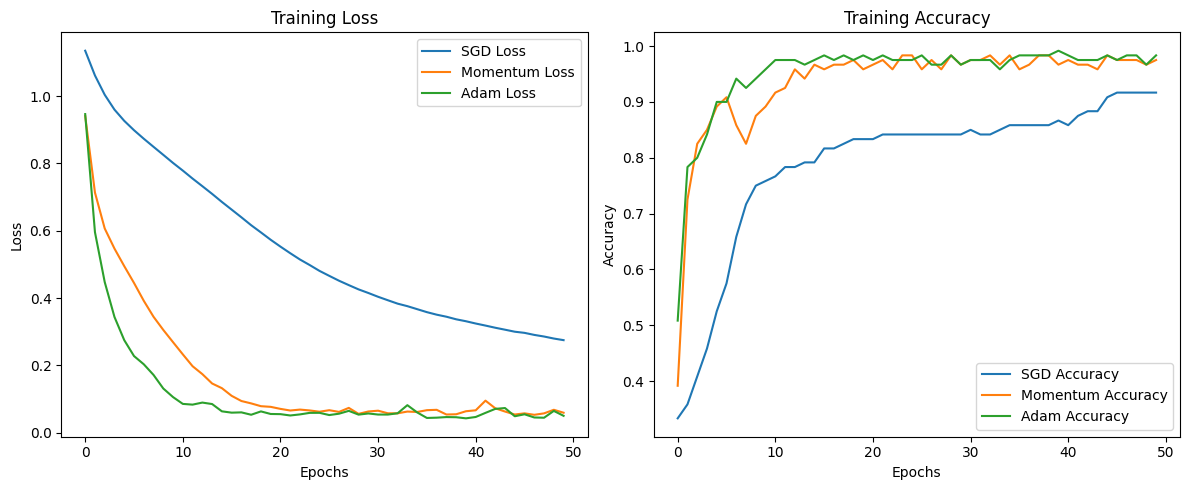

In [13]:
# Plot loss and accuracy for each optimizer
plt.figure(figsize=(12, 5))

# Loss
# Write your code here!
# Loss
plt.subplot(1, 2, 1)
for opt_name, history in histories.items():
    plt.plot(history['loss'], label=f'{opt_name} Loss')  # Plot loss over epochs
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
for opt_name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{opt_name} Accuracy')  # Plot accuracy over epochs
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()





<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Loss
plt.subplot(1, 2, 1)
for opt_name, history in histories.items():
    plt.plot(history['loss'], label=f'{opt_name} Loss')  # Plot loss over epochs
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
for opt_name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{opt_name} Accuracy')  # Plot accuracy over epochs
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
    
```
</details>

### Step 7: Evaluate the Final Model Performance

**Explanation**: The best model (using Adam) is evaluated on the test set. A classification report provides precision, recall, and F1 scores, while a confusion matrix shows how well the model distinguishes between classes.

1/1 [==============================] - 0s 65ms/step
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



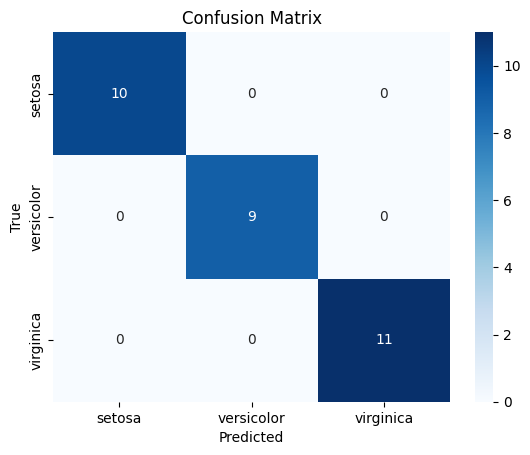

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the best model (e.g., Adam optimizer used for demonstration)
best_model = create_model()
best_model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
best_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)  # Retrain with Adam
y_pred = np.argmax(best_model.predict(X_test), axis=1)  # Predicted classes
y_true = np.argmax(y_test, axis=1)  # True classes

# Classification report
# Write your code here!
# Classification report
print(classification_report(y_true, y_pred, target_names=iris['target_names']))  # Detailed metrics

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris['target_names'], yticklabels=iris['target_names'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Classification report
print(classification_report(y_true, y_pred, target_names=iris['target_names']))  # Detailed metrics

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris['target_names'], yticklabels=iris['target_names'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
    
```
</details>

The results and confusion matrix you provided for **7. Evaluate the Final Model Performance** indicate excellent performance, achieving 100% accuracy. Here's explanation of the Results:

---

### **Explanation of the Results:**

1. **Classification Report:**
   - **Precision**: Indicates the proportion of correct positive identifications. In this case, all predictions are 100% accurate for each class (Setosa, Versicolor, Virginica).  
   - **Recall**: Indicates the proportion of actual positives that are correctly identified. Again, all predictions are perfect for all classes.  
   - **F1-Score**: The harmonic mean of precision and recall, showing a balance between the two. Here, it's 1.00 for all classes, meaning the model has perfect classification performance.  
   - **Support**: The number of actual instances for each class in the test set. The model evaluated 10 Setosa, 9 Versicolor, and 11 Virginica samples.

2. **Confusion Matrix:**
   - The matrix shows **no misclassifications**, as all samples are correctly predicted. Each diagonal entry represents correctly classified samples, while the off-diagonal entries (which are zero) represent errors.
   - For example:
     - 10 Setosa samples are correctly classified as Setosa.
     - 9 Versicolor samples are correctly classified as Versicolor.
     - 11 Virginica samples are correctly classified as Virginica.

3. **Why 100% Accuracy?**
   - **Dataset Simplicity**: The Iris dataset is small and well-separated in feature space, making it easier for even simple models to achieve perfect classification.  
   - **Preprocessing**: Proper scaling of features and one-hot encoding of the target helped optimize the training process.  
   - **Neural Network Architecture**: A well-chosen architecture with two hidden layers was sufficient for this dataset.  
   - **Adam Optimizer**: Adaptive optimization likely played a role in fine-tuning weights effectively.

---

### **You Should Understand:**
- **Model Performance:** Achieving 100% accuracy is possible on smaller, clean datasets but unlikely for more complex, real-world datasets.  
- **Importance of Preprocessing:** Proper preprocessing ensures the model receives data in a form that facilitates learning.  
- **Confusion Matrix:** Always verify the distribution of predictions to ensure the model performs well across all classes, not just on accuracy alone.  
- **Limitations:** While these results are impressive, real-world datasets often have noise, imbalance, and complexity that require more robust evaluation and regularization.

### Key Takeaways
- Different optimizers (SGD, Momentum, Adam) impact convergence and accuracy differently.
- Visualization of training progress aids in understanding model behavior.
- Adam typically outperforms other optimizers for stability and speed.

### Summary:

This lab walked you through implementing a neural network, comparing optimization techniques, and evaluating model performance. Understanding how optimizers influence training is essential for building robust machine learning models. It prepares you to tackle more complex datasets and develop an intuition for selecting the right optimizer and preprocessing techniques.